In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 7) # -4 ... 10 
print('SD:', SD)

SD: 0.010485760000000004


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'AMZN', 'ANET', 'APPH', 'ATVI', 'AXON', 'AYX',
    'BILI', 'BYND', 'COUR','CPNG', 'DDOG', 'DOCU', 'DUOL', 'EDIT', 
    'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'GOOG', 'INTG', 'ISRG', 
    'JD', 'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 
    'OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 'ROKU', 'SE', 
    'SHOP', 'SPLK', 'TDOC', 'TEAM', 'TREX', 'TSLA', 'TTD', 'TTWO', 'TWLO', 
    'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

58

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 9, 15))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['ISRG',
 'JD',
 'LULU',
 'LUV',
 'MDB',
 'MELI',
 'MNST',
 'MSFT',
 'MTCH',
 'NVCR',
 'OKTA',
 'PANW',
 '^NYA']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  13 of 13 completed
Generating derived columns...
   ...ISRG
   ...JD
   ...LULU
   ...LUV
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...OKTA
   ...PANW
   ...^NYA


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 ISRG
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 116.26922268640125
Refitting current best...
Current best ma returns: 119.9543973245643
Fraction Invested: 0.9947832249822738
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 119.95624062041014
Invested: 0.9947832249822738
New best: 119.97216395893366
Invested: 0.9947832249822738
New best: 119.97913504887399
Invested: 0.9947832249822738
New best: 119.97913504887399
Invested: 0.9947832249822738
New best: 119.96476852304761
Invested: 0.9947832249822738
New best: 119.9650571901403
Invested: 0.9947832249822738
New best: 119.9668213887247
Invested: 0.9947832249822738
New best: 119.96696126843457
Invested: 0.9947832249822738



Beginning ew_ma method...
-----------------

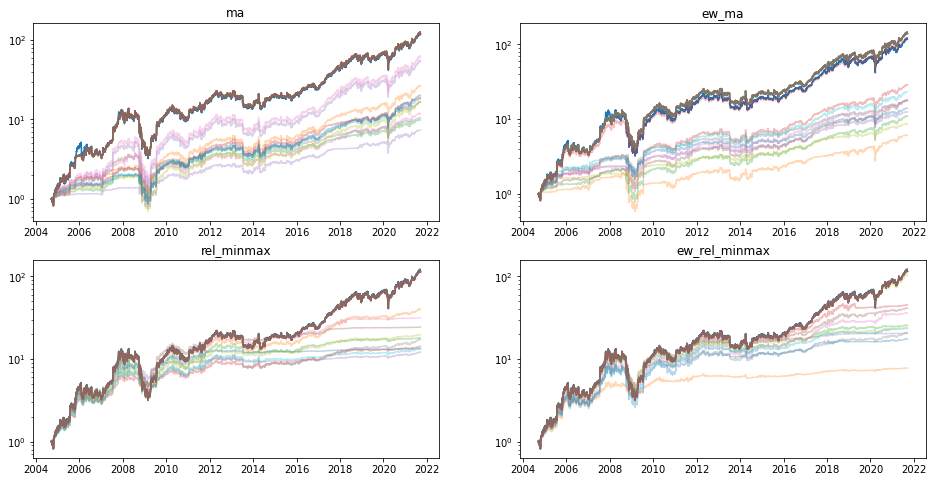

Saving ISRG params...



----------------------------------------------------------------------
                                 JD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.7836805657196195
Refitting current best...
Current best ma returns: 2.813621640870102
Fraction Invested: 0.9966433162152173
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 2.8011255291730417
Invested: 0.9966433162152173
New best: 2.801121948927024
Invested: 0.9966433162152173
New best: 2.801141177516559
Invested: 0.9966433162152173
New best: 2.801961698722205
Invested: 0.9966433162152173
New best: 2.8157099400125043
Invested: 0.9966433162152173
New best: 2.8177721892223913
Invested: 0.9966433162152173



Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 2.7836805657196195
Refitting current best..

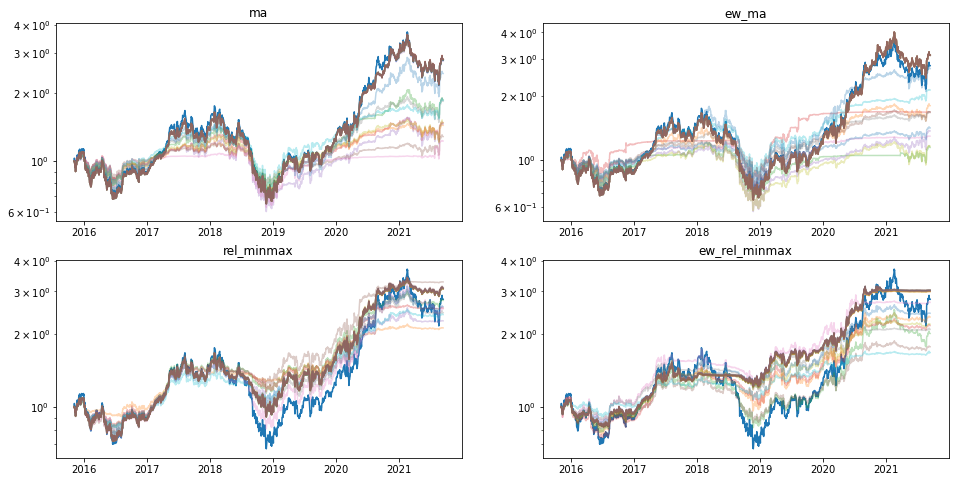

Saving JD params...



----------------------------------------------------------------------
                                 LULU
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 22.112873169404203
Refitting current best...
Current best ma returns: 24.04101045423006
Fraction Invested: 0.9993792240695154
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 24.04203328513946
Invested: 0.9993792240695154
New best: 24.042174103664134
Invested: 0.9993792240695154
New best: 24.04217842661885
Invested: 0.9993792240695154
New best: 24.043427829703884
Invested: 0.9993792240695154
New best: 24.043834355442776
Invested: 0.9993792240695154
New best: 24.044426468571423
Invested: 0.9993792240695154
New best: 24.07647460868953
Invested: 0.9993792240695154
New best: 24.74784661726637
Invested: 0.9993792240695154
New best: 24.74791660495559


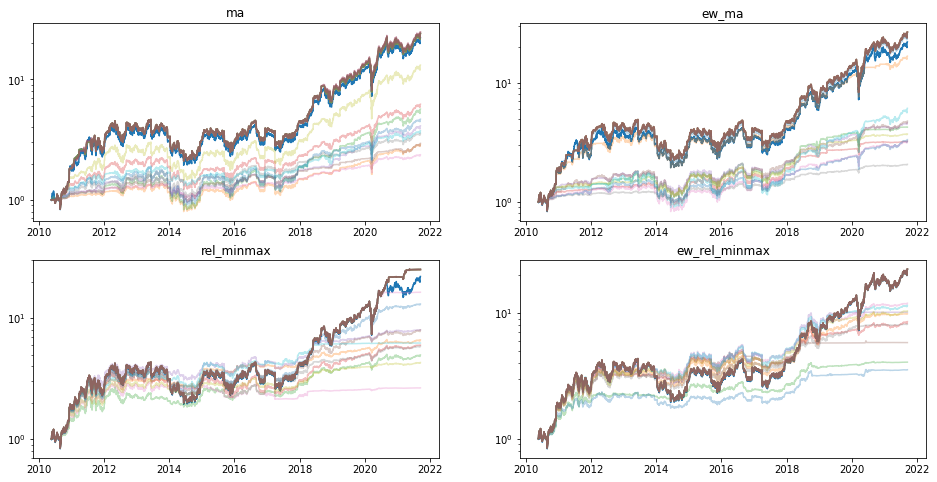

Saving LULU params...



----------------------------------------------------------------------
                                 LUV
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 75.58302839396111
Refitting current best...
Current best ma returns: 80.61013726759671
Fraction Invested: 0.9978709731233949
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 80.60554821739171
Invested: 0.9978709731233949
New best: 80.68173489703128
Invested: 0.9978709731233949
New best: 80.68481472166744
Invested: 0.9978709731233949
New best: 80.7425821675422
Invested: 0.9978709731233949
New best: 80.74438879233509
Invested: 0.9978709731233949
New best: 80.74549016432084
Invested: 0.9978709731233949
New best: 81.01924974783513
Invested: 0.9978709731233949
Round: 15


Beginning ew_ma method...
--------------------------------------------------
D

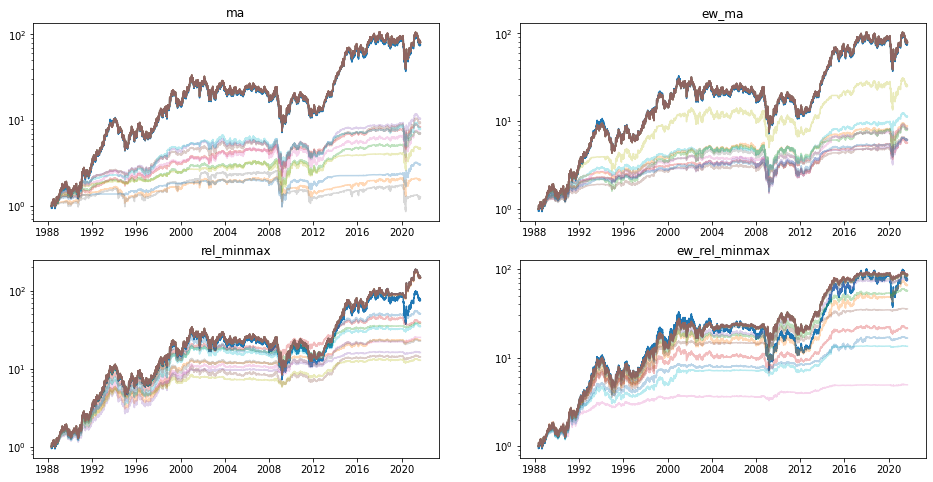

Saving LUV params...



----------------------------------------------------------------------
                                 MDB
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 8.966537227432335
Refitting current best...
Current best ma returns: 9.35726129932296
Fraction Invested: 0.061651973222021275
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 9.389403153569665
Invested: 0.061651973222021275
New best: 9.390809229330863
Invested: 0.061651973222021275
New best: 9.393975530545465
Invested: 0.061651973222021275
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 8.966537227432335
Refitting current best...
Current best ew_ma returns: 9.643206883777793
Fraction Invested: 0.9410475926764325
Beginning random search...
Round: 10
Beginning adjusted search...
New best

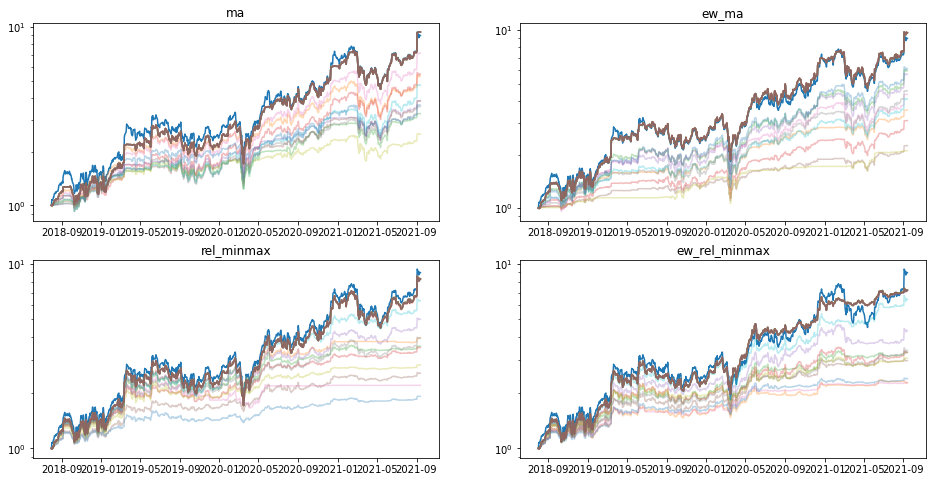

Saving MDB params...



----------------------------------------------------------------------
                                 MELI
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 35.37248437046487
Refitting current best...
Current best ma returns: 43.81338008022179
Fraction Invested: 0.9917106690574852
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 43.71203778369534
Invested: 0.9917106690574852
New best: 43.718993867074985
Invested: 0.9917106690574852
New best: 43.7506815473577
Invested: 0.9917106690574852
New best: 43.851047323153125
Invested: 0.9917106690574852
New best: 43.858982684114075
Invested: 0.9917106690574852
New best: 44.70118222887424
Invested: 0.9917106690574852
New best: 44.703281554485606
Invested: 0.9917106690574852
Round: 15


Beginning ew_ma method...
------------------------------------------------

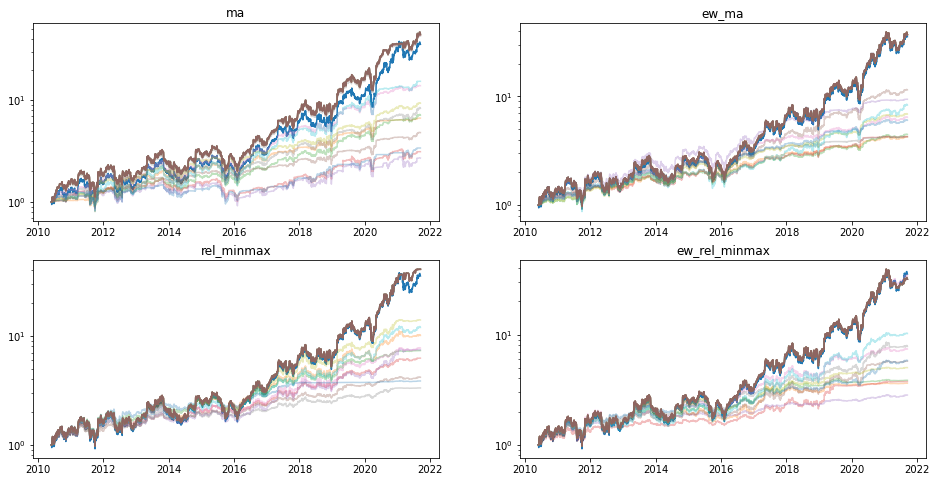

Saving MELI params...



----------------------------------------------------------------------
                                 MNST
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1220.9919921875
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 1220.9919921875
Refitting current best...
Current best ew_ma returns: 1257.0205908817472
Fraction Invested: 0.9854069472758175
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 1256.8612955638391
Invested: 0.9854069472758175
New best: 1266.1916683175548
Invested: 0.9854069472758175
New best: 1270.6559647306358
Invested: 0.9854069472758175
New best: 1278.9736441749421
Invested: 0.9854069472758175
New best: 1226.

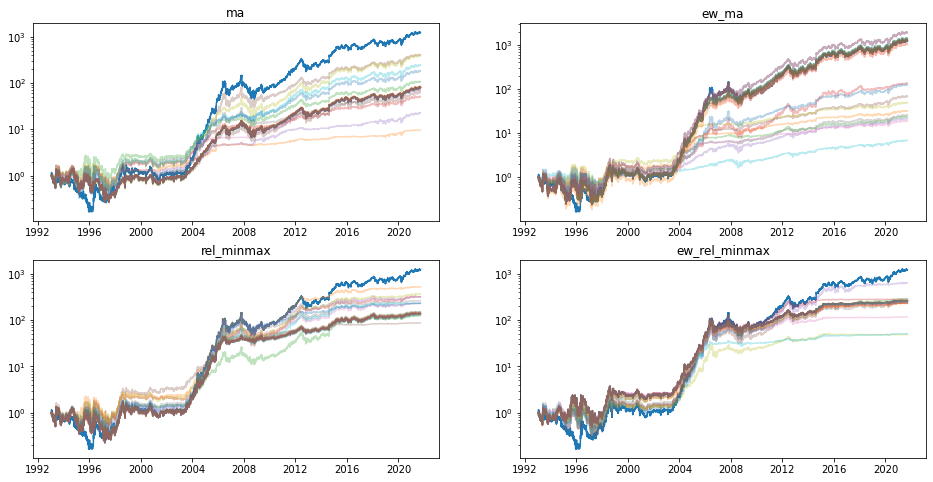

Saving MNST params...



----------------------------------------------------------------------
                                 MSFT
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 168.8330415349056
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 168.8330415349056
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 168.8330415349056
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_rel_minmax method...
----------------

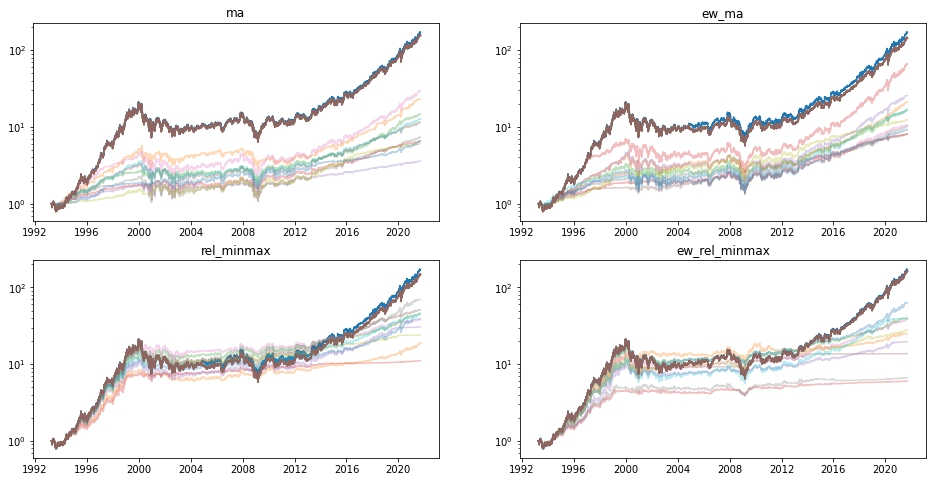

Saving MSFT params...



----------------------------------------------------------------------
                                 MTCH
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 74.70628373712617
Refitting current best...
Current best ma returns: 93.60067073783463
Fraction Invested: 0.9969513200368703
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 93.60227378710076
Invested: 0.9969513200368703
New best: 93.60345932152435
Invested: 0.9969513200368703
New best: 93.60930113784467
Invested: 0.9969513200368703
New best: 93.61530711732439
Invested: 0.9969513200368703
New best: 104.02205488086622
Invested: 0.9969513200368703
New best: 104.02377339652773
Invested: 0.9969513200368703
New best: 104.02420335536974
Invested: 0.9969513200368703
New best: 104.0272557213654
Invested: 0.9969513200368703



Beginning ew_ma method...

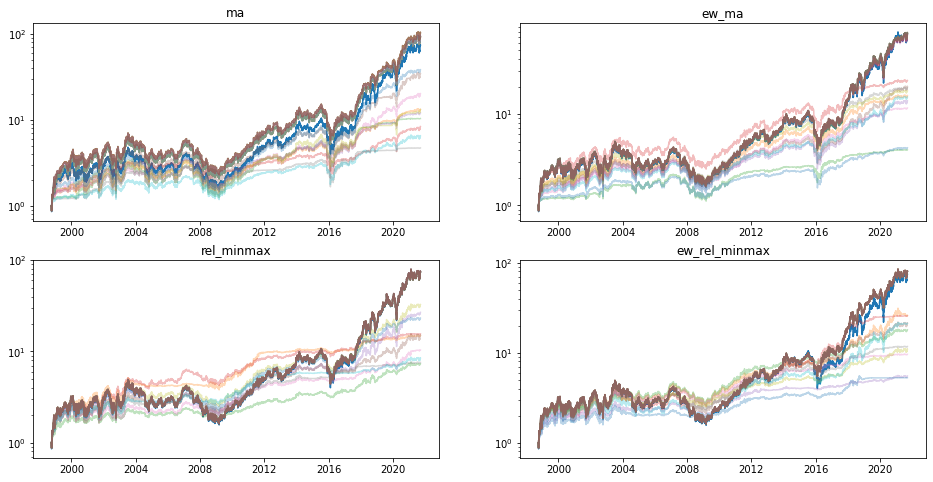

Saving MTCH params...



----------------------------------------------------------------------
                                 NVCR
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 15.512573995415512
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 15.512573995415512
Refitting current best...
Current best ew_ma returns: 18.645306410478312
Fraction Invested: 0.9999976856643279
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 18.63300557716027
Invested: 0.9999976856643279
New best: 18.656150298247997
Invested: 0.9999976856643279
New best: 18.665253503151252
Invested: 0.9999976856643279
New best: 18.6662213453582
Invested: 0.9999976856643279
New best: 18

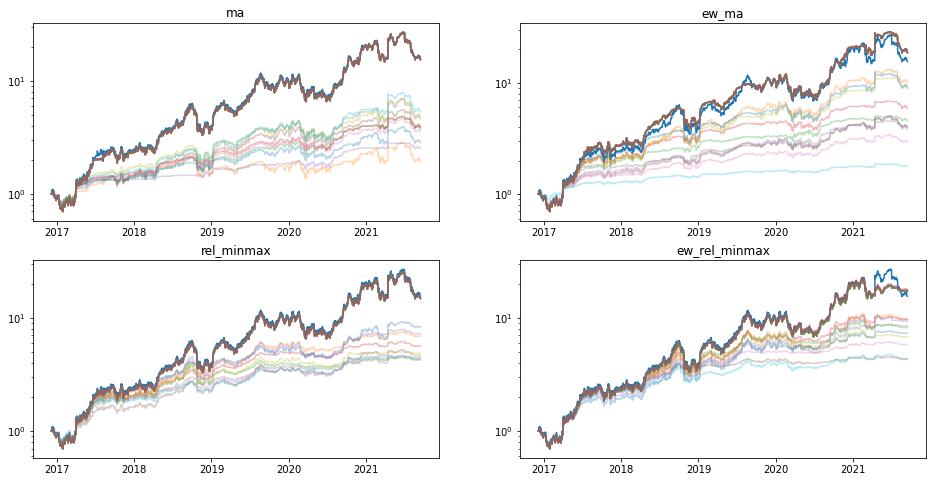

Saving NVCR params...



----------------------------------------------------------------------
                                 OKTA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 6.611817373650793
Refitting current best...
Current best ma returns: 6.756760600813045
Fraction Invested: 0.9980610228144933
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 6.74834263132659
Invested: 0.9980610228144933
New best: 6.748602557101564
Invested: 0.9980610228144933
New best: 6.748648800275207
Invested: 0.9980610228144933
New best: 6.748779780440957
Invested: 0.9980610228144933
New best: 6.750191286094422
Invested: 0.9976801622279425
New best: 6.750197617868965
Invested: 0.9976801622279425
New best: 6.7541669637161
Invested: 0.9976801622279425
New best: 6.760875154831513
Invested: 0.9976801622279425
Round: 15


Beginning ew_ma method

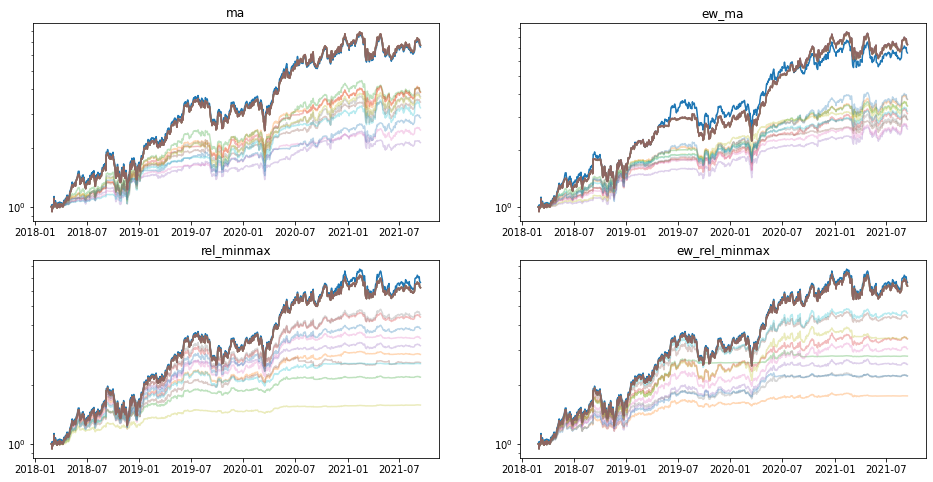

Saving OKTA params...



----------------------------------------------------------------------
                                 PANW
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 7.495591808658342
Refitting current best...
Current best ma returns: 8.199734809408588
Fraction Invested: 0.987412725893636
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 8.202591613601966
Invested: 0.987412725893636
New best: 8.206651369318536
Invested: 0.987412725893636
New best: 8.209415947490703
Invested: 0.987412725893636
New best: 8.211774666304304
Invested: 0.987412725893636
New best: 8.211782519287834
Invested: 0.987412725893636
New best: 8.213426897055669
Invested: 0.987412725893636
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 7.495591808658342
Refitting current best...

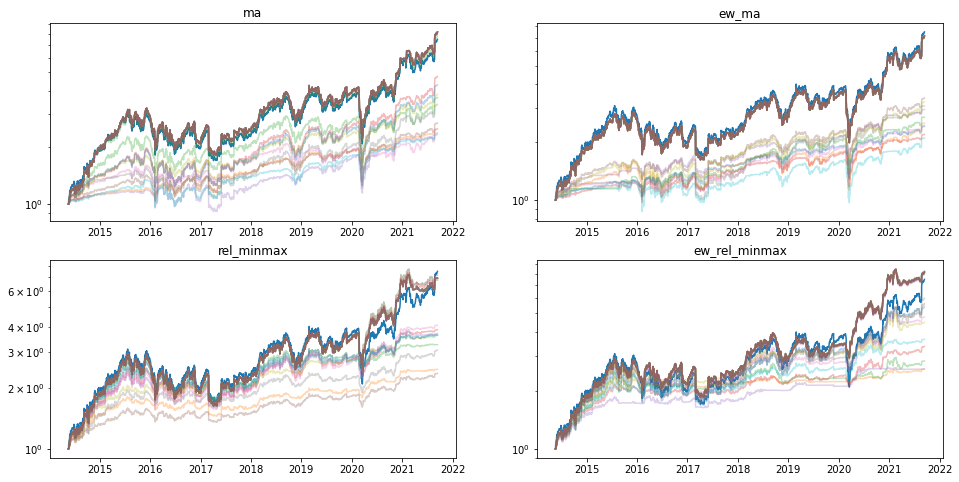

Saving PANW params...



----------------------------------------------------------------------
                                 ^NYA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 9.552937874378737
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 9.552937874378737
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 9.552937874378737
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_rel_minmax method...
----------------

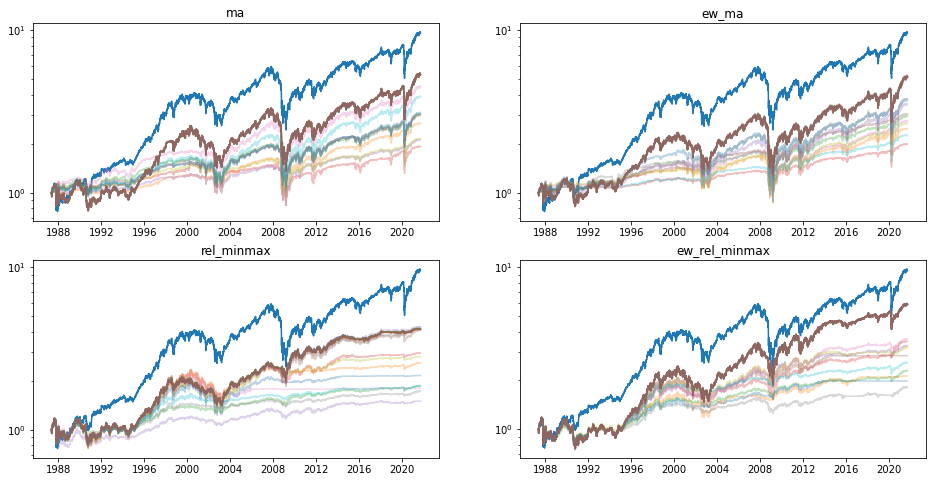

Saving ^NYA params...


In [14]:
N_RAND = 10
N_ADJ = 15

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    try:
        best_params, best_returns = read_best_params(stock)
        stock_data = get_stock_data(stock, data)
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
        qp = QPercent(stock_data, 
                      N_CUTS, 
                      best_param_set=best_params, 
                      best_returns=best_returns, 
                      sd=SD)
        qp.run_sims(N_RAND, N_ADJ)
        best = get_best_param_set(qp)
        save_best_param_set(best, stock)
    except BaseException as e:
        print(f'Error encountered\n{e}')

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


ISRG:
  Best Return: 140.34301044447358 (ew_ma)
  86.76% in

JD:
  Best Return: 3.1281164740816036 (ew_ma)
  92.87% in

LULU:
  Best Return: 26.816775234135115 (ew_ma)
  99.35% in

LUV:
  Best Return: 147.5717490988495 (rel_minmax)
  79.36% in

MDB:
  Best Return: 9.654502254673192 (ew_ma)
  94.66% in

MELI:
  Best Return: 44.703281554485606 (ma)
  99.17% in

MNST:
  Best Return: 1906.5058649156613 (ew_ma)
  98.54% in

MSFT:
  Best Return: 168.8330415349056 (ma)
  100.00% in

MTCH:
  Best Return: 104.0272557213654 (ma)
  99.70% in

NVCR:
  Best Return: 18.66749408197176 (ew_ma)
  100.00% in

OKTA:
  Best Return: 7.361845193714345 (ew_ma)
  100.00% in

PANW:
  Best Return: 8.22644571495456 (ew_rel_minmax)
  58.62% in

^NYA:
  Best Return: 9.552937874378737 (ma)
  100.00% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq